**NLP Project:Twitter US Airline Sentiment**

**Data Description**

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as \"late flight\" or \"rude service\").

**Dataset**

- Tweet.csv

**Objective**

- To classify the sentiment of tweets into the positive, neutral & negative.
- Build an app using Streamlit for users to make predictions or inference using your model.

**Importing the libraries**

In [ ]:
 !pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters

#import unidecode

# Importing the NLTK library
import nltk

nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the dataset**

In [5]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

In [6]:
# Creating the copy of the data frame
df = data.copy()

In [7]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
df["airline_sentiment"].nunique()

3

In [9]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

**Overview of the dataset**

In [10]:
df = df.loc[:, ["text", "airline_sentiment"]]

In [11]:
# encoding  'negative': -1, 'neutral': 0, 'positive':1
df['airline_sentiment'].replace({'negative': -1, 'neutral': 0, 'positive':1}, inplace = True)

# cast to integer
df['airline_sentiment'] = df['airline_sentiment'].astype(int)

In [12]:
# Print shape of data
df.shape

(14640, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 228.9+ KB


In [14]:
# checking for duplicate values
df.duplicated().sum()

188

**Exploratory Data Analysis**

Word Cloud for cleaned Negative Reviews

In [15]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = df[df['airline_sentiment'] == 0]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [16]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


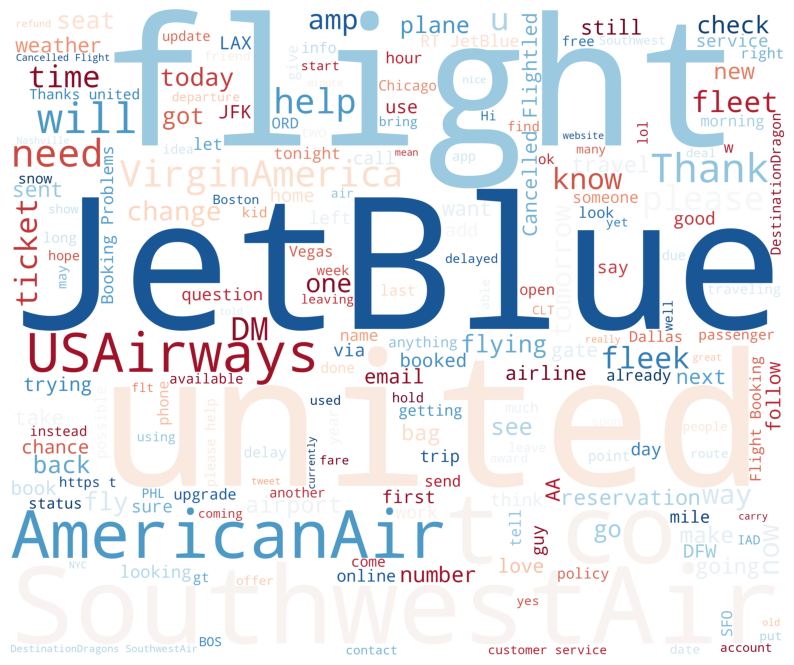

In [17]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Data Preprocessing**

In [19]:
def remove_special_chars(texts):
  texts = re.sub('[^a-zA-Z]', ' ', texts)
  return texts

df["text"] = df["text"].apply(lambda x: remove_special_chars(x))
# data.head(2)

In [22]:
df.head()

,text,airline_sentiment
0,VirginAmerica What dhepburn said,0
1,VirginAmerica plus you ve added commercials to the experience tacky,1
2,VirginAmerica I didn t today Must mean I need to take another trip,0
3,VirginAmerica it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,-1
4,VirginAmerica and it s a really big bad thing about it,-1


In [24]:
import contractions

# Let us fix the contractions in the data

def replace_contractions(texts):
  return contractions.fix(texts)

df["text"] = df["text"].apply(lambda x: replace_contractions(x))

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
df["text"] = df.apply(lambda row: nltk.word_tokenize(row["text"]), axis = 1)

In [27]:
def to_lowercase(row):
  words = [word.lower() for word in row]
  return words

df["text"] = df["text"].apply(lambda x: to_lowercase(x))


In [28]:
df.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",0
1,"[virginamerica, plus, you, ve, added, commercials, to, the, experience, tacky]",1
2,"[virginamerica, i, didn, t, today, must, mean, i, need, to, take, another, trip]",0
3,"[virginamerica, it, s, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]",-1
4,"[virginamerica, and, it, s, a, really, big, bad, thing, about, it]",-1


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

df["text"] = df["text"].apply(lambda x: remove_stopwords(x))

In [31]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

lm = WordNetLemmatizer()

ps = PorterStemmer()

def lemmatize_words(row):
  words = [lm.lemmatize(word) for word in row]
  #words = [ps.stem(word) for word in row]   # for stemming
  return words

df["text"] = df["text"].apply(lambda x: lemmatize_words(x))

**Putting All together**

In [33]:
def join_words(row):
  words = " ".join([word for word in row])
  return words

df["text"] = df["text"].apply(lambda x: join_words(x))

In [34]:
df.head()

,text,airline_sentiment
0,virginamerica dhepburn said,0
1,virginamerica plus added commercial experience tacky,1
2,virginamerica today must mean need take another trip,0
3,virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse,-1
4,virginamerica really big bad thing,-1


In [35]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_df.csv", index = False)

**Sequential model - LSTM**
Sequential models is a common name for Neural Network architectures, that have units with memory. Here we shall be using LSTM, which is a type of Recurrent Neural Network layer as the memory units.

A typical LSTM unit is made up of a cell, an input gate, an output gate, and a forget gate. The cell is responsible for "remembering" values over extended periods of time and "forgetting" certain values when the context changes. This allows LSTM to maintain "memory." Each of the three gates can be viewed as a Fully-Connected Artificial Neural Network, or Multi-Layer Perceptrons. They calculate an activation (using an activation function) of a weighted sum. Additionally, the input and output vectors are accompanied by a context vector that contains information about the summary of the text it has processed thus far.

Intuitively, the gates regulate the flow of values that pass through the connections of the LSTM, which is why they are referred to as "gates." They tend to output values between '1' and '0', where '1' is multiplied with the context and input vectors. The values that are multiplied with zero are forgotten and those multiplied with 1 are remembered.

**Components of the LSTM**

The LSTM cell contains the following components:

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)

**Working of gates in LSTM**

First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

In [36]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from tensorflow.keras.models import Sequential
#import tensorflow as tf
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

**Tokenizing and converting the reviews into numerical vectors**

In [37]:
# Creating the tokenizer with 700 vocab size
tokenizer = Tokenizer(num_words = 700, split = ' ')

tokenizer.fit_on_texts(df['text'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(df['text'].values)

# Padding the sequences
X = pad_sequences(X, 100)

In [38]:
import pickle

with open("/content/drive/MyDrive/Colab Notebooks/tokenizer.pkl", "wb") as handle:
  pickle.dump(tokenizer, handle)

**Model Building**

In [39]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = 100))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(3, activation = 'softmax'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [40]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 120)          84000     
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 3)                 453       
                                                                 
Total params: 247053 (965.05 KB)
Trainable params: 247053 (965.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "orange" would be located near "tangerine" and "queen" would be near "empress." The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 150 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- To prevent bias, a dropout layer is employed to regulate the network.

- The final layer is a Dense layer which serves as the output layer and has 3 cells to perform classification, representing the 3 different categories in this example.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

**Splitting the Data**

In [41]:
# creating the target feature
y = df['airline_sentiment']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_train_enc = to_categorical(y_train, 3)
y_test_enc = to_categorical(y_test, 3)

**Training the model**

In [44]:
model_path = "/content/drive/MyDrive/Colab Notebooks/NLP_model.h5"
es = EarlyStopping(patience=3, verbose=2, monitor = "val_loss")
chkpt = ModelCheckpoint(model_path, verbose = 2, save_best_only = True)

In [46]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [47]:
# specifying the batch size
batch_size = 32

# fitting the model on the training data with 10 epochs
his = model.fit(X_train, y_train_enc, epochs = 10, batch_size = batch_size, callbacks=[es, chkpt],verbose = 1,
                validation_split = 0.1)

Epoch 1/10
371/371 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.7102
Epoch 1: val_loss improved from inf to 0.36275, saving model to /content/drive/MyDrive/Colab Notebooks/NLP_model.h5
371/371 [==============================] - 205s 527ms/step - loss: 0.4195 - accuracy: 0.7102 - val_loss: 0.3627 - val_accuracy: 0.7451
Epoch 2/10
371/371 [==============================] - ETA: 0s - loss: 0.3343 - accuracy: 0.7787
Epoch 2: val_loss improved from 0.36275 to 0.35089, saving model to /content/drive/MyDrive/Colab Notebooks/NLP_model.h5
371/371 [==============================] - 183s 494ms/step - loss: 0.3343 - accuracy: 0.7787 - val_loss: 0.3509 - val_accuracy: 0.7496
Epoch 3/10
371/371 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.7887
Epoch 3: val_loss improved from 0.35089 to 0.34593, saving model to /content/drive/MyDrive/Colab Notebooks/NLP_model.h5
371/371 [==============================] - 181s 488ms/step - loss: 0.3170 - accuracy: 